# PREDICTING PERFORMANCE OF A STUDENT USING LINEAR REGRESSION

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/Hp/Desktop/pyth/data sets/Student_Performance.csv")
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
def check_df(df):
    print("##################### Shape #####################")
    print(df.shape)
    print("##################### Head #####################")
    print(df.head())
    print("##################### Tail #####################")
    print(df.tail())
    print("##################### DTypes #####################")
    print(df.dtypes)
    print("##################### Info #####################")
    print(df.describe().T)
    print("##################### NA #####################")
    print(df.isnull().sum())
check_df(data)

##################### Shape #####################
(10000, 6)
##################### Head #####################
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
##################### Tail #####################
      Hours Studied  Previous Scores

In [4]:
data.drop(columns=['Extracurricular Activities'],inplace=True)
data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


In [5]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [6]:
corellation = data.corr()

<Axes: >

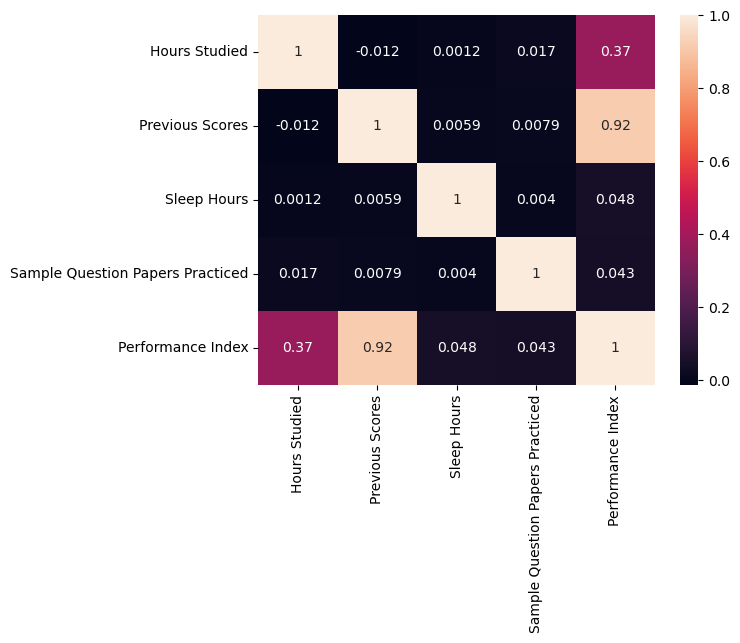

In [7]:
sns.heatmap(corellation,xticklabels=corellation.columns,yticklabels=corellation.columns,annot=True)

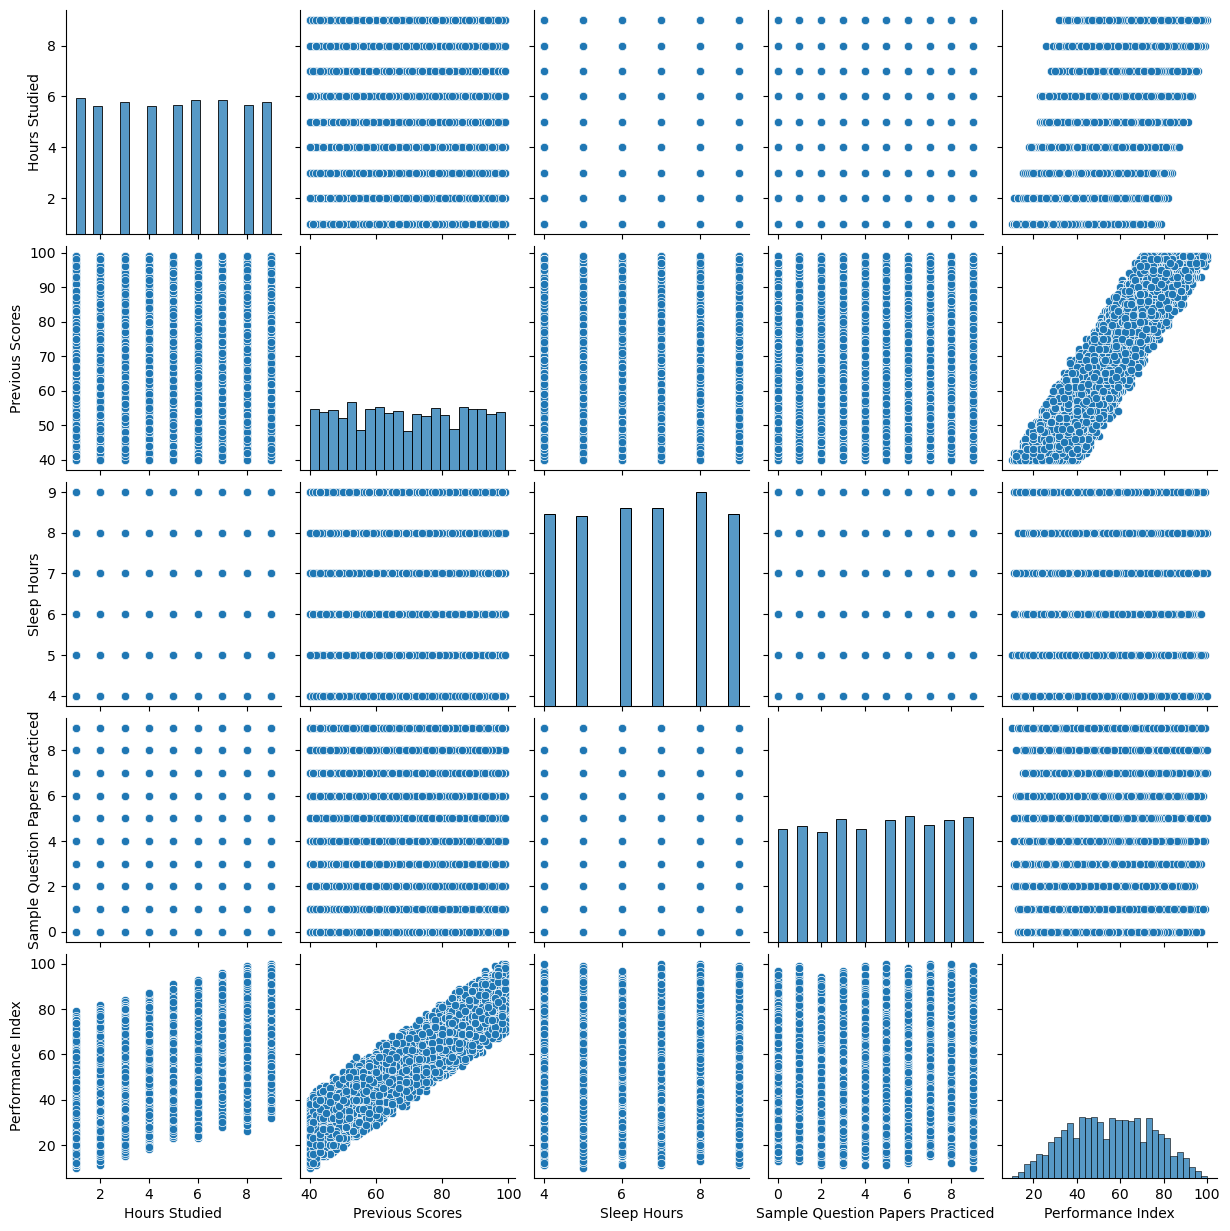

In [8]:
sns.pairplot(data)

### Hours studied

Text(0.5, 1.0, 'box plot of hours studied')

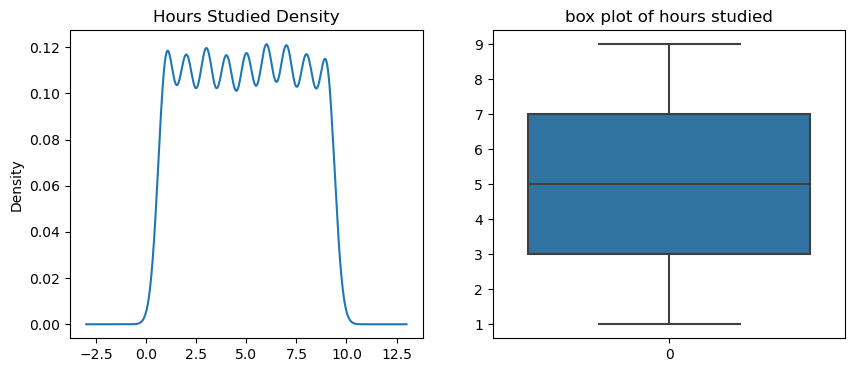

In [9]:
plt.figure(1,figsize=(10,4))
plt.subplot(121)
data['Hours Studied'].plot(kind='kde',title='Hours Studied Density')
plt.subplot(122)
sns.boxplot(data['Hours Studied']).set_title("box plot of hours studied")

### Previous scores

Text(0.5, 1.0, 'barpltot hours studied/previous score')

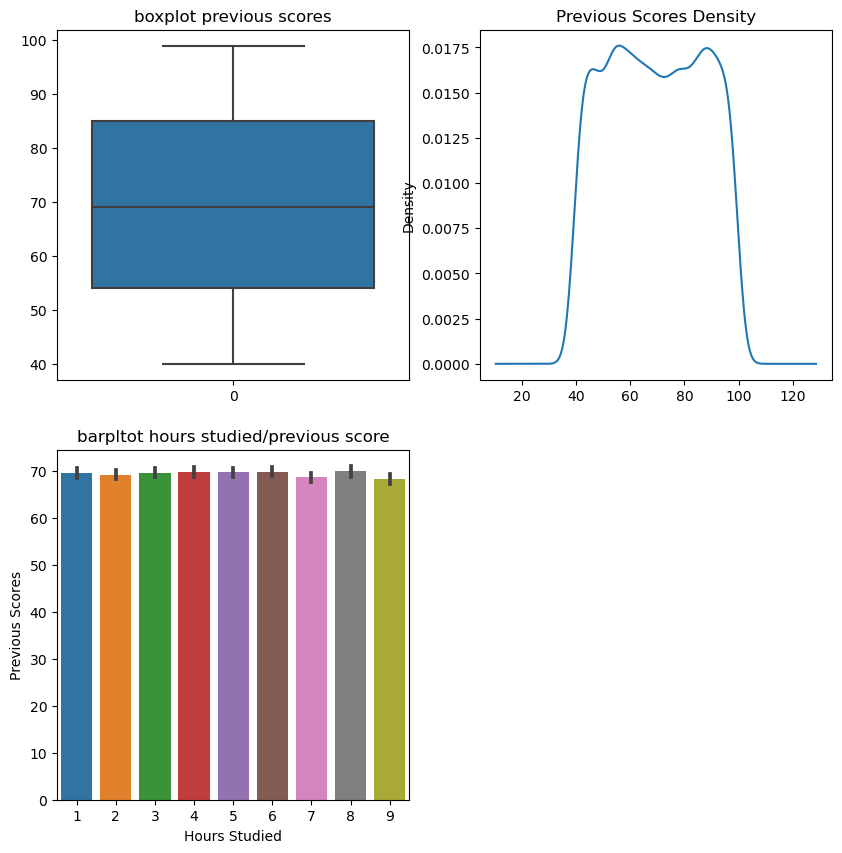

In [10]:
plt.figure(1,figsize=(10,10))
plt.subplot(221)
sns.boxplot(data['Previous Scores']).set_title("boxplot previous scores")
plt.subplot(222)
data['Previous Scores'].plot(kind ='kde',title='Previous Scores Density')
plt.subplot(223)
sns.barplot(y=data['Previous Scores'],x=data['Hours Studied'],data=data).set_title("barpltot hours studied/previous score")

## Sleep Hours

Text(0.5, 1.0, 'box plot of Sleep Hours')

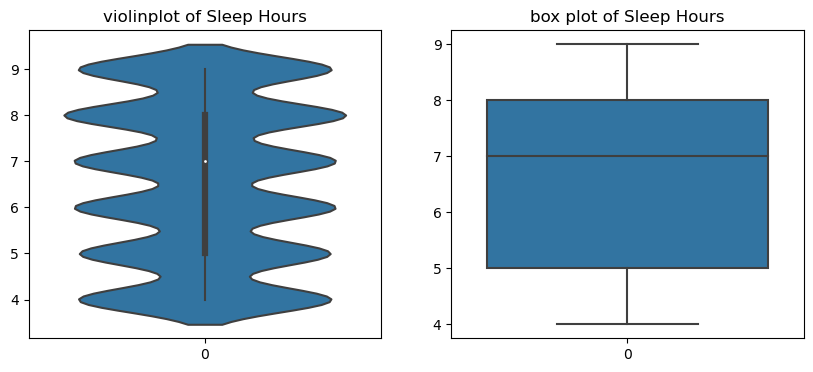

In [11]:
plt.figure(1,figsize=(10,4))
plt.subplot(121)
sns.violinplot(data['Sleep Hours']).set_title("violinplot of Sleep Hours")
plt.subplot(122)
sns.boxplot(data['Sleep Hours']).set_title("box plot of Sleep Hours")

## Sample Question Papers Practiced

Text(0.5, 1.0, 'barplt of Sample Question Papers Practiced')

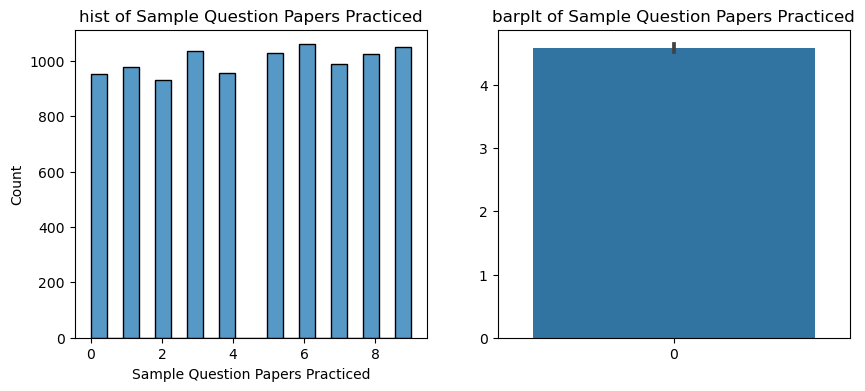

In [12]:
plt.figure(1,figsize=(10,4))
plt.subplot(121)
sns.histplot(data['Sample Question Papers Practiced']).set_title("hist of Sample Question Papers Practiced")
plt.subplot(122)
sns.barplot(data['Sample Question Papers Practiced']).set_title("barplt of Sample Question Papers Practiced")

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

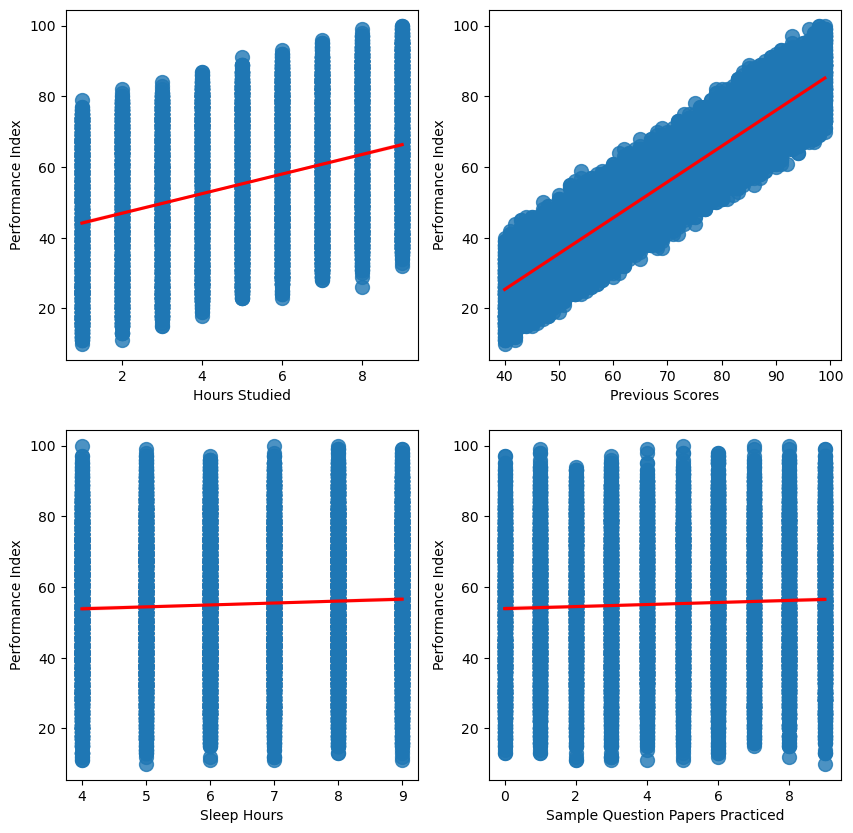

In [13]:
plt.figure(1,figsize=(10,10))
plt.subplot(221)
sns.regplot(x=data['Hours Studied'],y=data['Performance Index'], scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.subplot(222)
sns.regplot(x=data['Previous Scores'],y=data['Performance Index'], scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.subplot(223)
sns.regplot(x=data['Sleep Hours'],y=data['Performance Index'], scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.subplot(224)
sns.regplot(x=data['Sample Question Papers Practiced'],y=data['Performance Index'], scatter_kws={'s': 100}, line_kws={'color': 'red'})

## Linear Regression

In [14]:
from sklearn.model_selection import train_test_split
X=data[['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced']]
Y = data['Performance Index']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [16]:
print(model.predict(X_test))
print(Y_test)

[56.76699588 32.16395395 60.25317666 ... 41.18640756 27.59617694
 46.61868706]
3093    55.0
5114    35.0
9206    62.0
8835    92.0
9158    72.0
        ... 
9913    26.0
3407    42.0
721     41.0
6093    28.0
7393    43.0
Name: Performance Index, Length: 2500, dtype: float64


In [17]:
model.score(X_train,Y_train)

0.9883824636865923